# Imports

In [33]:
# se não tiver instalado
# !pip install networkx

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Breadth-First Search - BFS

Este notebook mostra passo a passo como o algoritmo BFS (Busca em Largura) visita os nós de um grafo. O algoritmo BFS é um algoritmo de busca em grafos que começa em um nó raiz e explora todos os seus vizinhos antes de avançar para os vizinhos dos vizinhos.

O algoritmo BFS é implementado usando uma fila.

- O algoritmo começa com a inserção do nó raiz na fila.
- Em seguida, ele remove o nó da fila e explora todos os seus vizinhos.
- Os vizinhos são inseridos na fila. O algoritmo continua até que a fila esteja vazia.

O algoritmo BFS é usado para encontrar **o menor caminho entre dois nós em um grafo sem pesos**.

Passo a passo:

1. Escolha um nó inicial e o adicione à fila.
2. Marque esse nó como visitado.
3. Enquanto a fila não estiver vazia:
    Remova o primeiro nó da fila.

    Visite todos os vizinhos não visitados desse nó.

    Adicione os vizinhos à fila e marque-os como visitados.

### Função para desenhar o grafo

In [35]:
def desenhar_grafo(G, visitados, fila=[], titulo=""):
    plt.figure(figsize=(6, 4))
    cores = ['lightgreen' if node in visitados else 'skyblue' for node in G.nodes()]
    labels = {n: n for n in G.nodes()}
    nx.draw(G, pos, with_labels=True, labels=labels, node_color=cores,
            edge_color='gray', node_size=2000, font_size=14, font_weight='bold')
    if fila:
        fila_texto = "Fila: [" + ", ".join(fila) + "]"
        plt.figtext(0.5, 0.01, fila_texto, wrap=True, horizontalalignment='center', fontsize=12)
    plt.title(titulo)
    plt.axis('off')
    plt.show()

### Grafo

In [36]:
grafo = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A', 'E'],
    'D': ['B'],
    'E': ['C']
}

In [37]:
grafo.items()

dict_items([('A', ['B', 'C']), ('B', ['A', 'D']), ('C', ['A', 'E']), ('D', ['B']), ('E', ['C'])])

In [38]:
G = nx.Graph()

# estamos adicionado os nós e suas arestas aos seus vizinhos
for origem, vizinhos in grafo.items():
    for destino in vizinhos:
        G.add_edge(origem, destino)

pos = nx.spring_layout(G, seed=42)

### Implementando o BFS

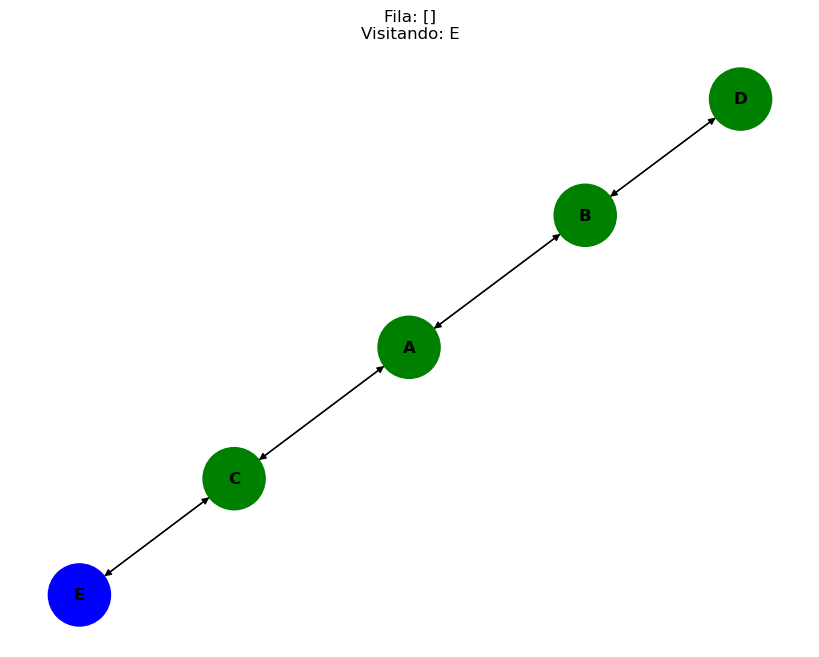

In [49]:

def bfs_visual(grafo_dict, inicio):
    G = nx.DiGraph()
    for node, neighbors in grafo_dict.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    visitados = set()
    fila = [inicio]

    pos = nx.spring_layout(G)

    while fila:
        clear_output(wait=True)
        plt.figure(figsize=(8, 6))
        vertice = fila.pop(0)

        if vertice not in visitados:
            visitados.add(vertice)
            fila.extend(v for v in grafo_dict[vertice] if v not in visitados and v not in fila)

        color_map = []
        for node in G:
            if node == vertice:
                color_map.append('blue')      # nó atual
            elif node in visitados:
                color_map.append('green')     # nós visitados
            else:
                color_map.append('lightgray') # ainda não visitado

        nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=2000, font_weight='bold', arrows=True)
        plt.title(f"Fila: {fila}\nVisitando: {vertice}")
        plt.show()
        time.sleep(1)

bfs_visual(grafo, 'A')

Passos de visita (começando de 'A'):
Começa com ['A'] na fila

Remove A, visita: visitados = [A] → adiciona B, C na fila → fila: [B, C]

Remove B, visita: visitados = [A, B] → D entra na fila → fila: [C, D]

Remove C, visita: visitados = [A, B, C] → E entra na fila → fila: [D, E]

Remove D, visita: visitados = [A, B, C, D] → fila: [E]

Remove E, visita: visitados = [A, B, C, D, E] → fila: []

## Depth-First Search - DFS

O algoritmo DFS (Busca em Profundidade) é um algoritmo de busca em grafos que começa em um nó raiz e explora o máximo possível ao longo de cada ramo antes de retroceder.

O algoritmo DFS é implementado usando uma pilha.

- O algoritmo começa com a inserção do nó raiz na pilha.
- Em seguida, ele remove o nó da pilha e explora todos os seus vizinhos.
- Os vizinhos são inseridos na pilha.
- O algoritmo continua até que a pilha esteja vazia.

O DFS **não garante que o menor caminho entre dois nós seja encontrado**.


## Comparação: BFS vs DFS

| Aspecto         | BFS                        | DFS                      |
|-----------------|----------------------------|--------------------------|
| Estratégia      | Largura (camadas)          | Profundidade (caminhos)  |
| Estrutura usada | Fila (queue)               | Pilha (stack)            |
| Caminho mínimo  | Sim (sem pesos)            | Não                      |

- que tal irmos ao notebook de hippies_and_punks agora?